In [3]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from common import common
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import fetch_covtype

In [16]:
# Function to evaluate and print model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    seconds = time.time()
    # Train the model
    model.fit(X_train, y_train)
    print("Train operation time: = ",time.time()- seconds ,"seconds")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print model evaluation metrics
    common.evaluate(y_test, y_pred, f"\nModel: {model.__class__.__name__}")

In [17]:
# Dictionary to store models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVM)": SVC()
}

In [18]:
%run unsw.ipynb

In [19]:
# Should already be one hot encoded and label encoded
all_df, main_labels, config = get_processed_unsw_df()
TARGET_COLUMN = config['TARGET_COLUMN']
NORMAL_TARGET = config['NORMAL_TARGET']
TARGET_DICT = config['TARGET_DICT']
INV_TARGET_DICT = config['INV_TARGET_DICT']
NUMERICAL_COLUMNS = config['NUMERICAL_COLUMNS']
CATEGORICAL_COLUMNS = config['CATEGORICAL_COLUMNS']
ORDINAL_COLUMNS = config['ORDINAL_COLUMNS']
all_df.head()

Normal class:  0    Normal
Name: attack_cat, dtype: category
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']
TARGET_DICT {0: 'Analysis', 1: 'Backdoor', 2: 'DoS', 3: 'Exploits', 4: 'Fuzzers', 5: 'Generic', 6: 'Normal', 7: 'Reconnaissance', 8: 'Shellcode', 9: 'Worms'}
NORMAL_TARGET 6
main_labels Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload',
       'sloss', 'dloss',
       ...
       'service_ssl', 'state_CON', 'state_ECO', 'state_FIN', 'state_INT',
       'state_PAR', 'state_REQ', 'state_RST', 'state_URN', 'state_no'],
      dtype='object', length=187)


,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087486,14158.942383,8495.365234,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473373,8395.112305,503571.312500,2,17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,1572.271851,60929.230469,1,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,2740.178955,3358.622070,1,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449454,10,6,534,268,33.373825,8561.499023,3987.059814,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Get X and y from all_df
X_df = all_df.drop(columns=[TARGET_COLUMN])
y_df = all_df[TARGET_COLUMN]

# Split the data into training and testing sets (80% train, 20% test)
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
print(X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape)

(140272, 186) (35069, 186) (140272,) (35069,)


In [21]:
# Scale the features (required for some models, especially SVM)
scaler = StandardScaler()

X_train_scaled_df = X_train_df.copy()
X_train_scaled_df[NUMERICAL_COLUMNS] = scaler.fit_transform(X_train_scaled_df[NUMERICAL_COLUMNS])

X_test_scaled_df = X_test_df.copy()
X_test_scaled_df[NUMERICAL_COLUMNS] = scaler.transform(X_test_scaled_df[NUMERICAL_COLUMNS])

Train operation time: =  46.7352979183197 seconds

Model: LogisticRegression
Confusion Matrix:
[[  25    0    3  338    2    0   25    0    0    0]
 [   0    1    6  305   16    0   12   20    0    0]
 [   0    0   32 2139   75   16   66   42    0    0]
 [   1    2   83 5686  334   18  383  265    0    0]
 [   0    0    2  437 2322    0  494  315    0    0]
 [   0    0    2  135   32 7886   18    6    0    0]
 [  12    0    4  284 1571    9 9085  204    0    0]
 [   0    0    9  505  208    7   34 1335    0    0]
 [   0    0    0    0  113    0    5  115    0    0]
 [   0    0    0   21    2    0    0    2    0    0]]


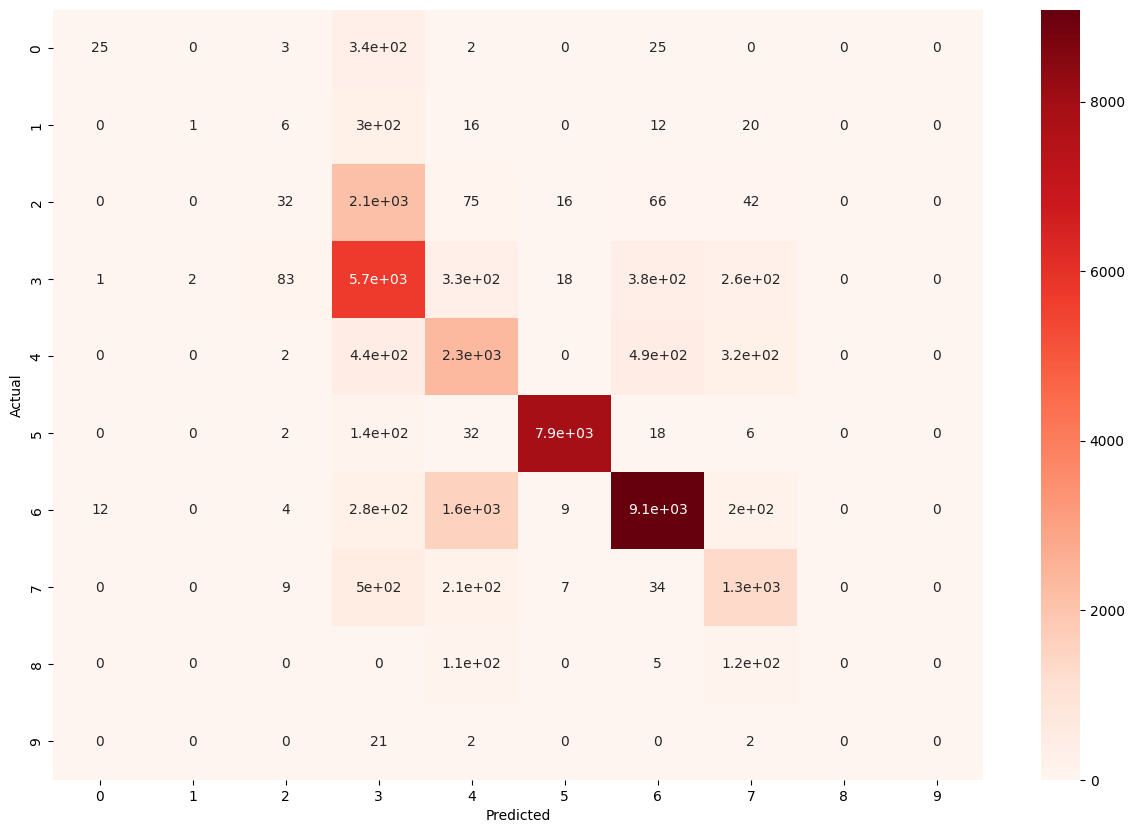


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.06      0.12       393
           1       0.33      0.00      0.01       360
           2       0.23      0.01      0.03      2370
           3       0.58      0.84      0.68      6772
           4       0.50      0.65      0.56      3570
           5       0.99      0.98      0.98      8079
           6       0.90      0.81      0.85     11169
           7       0.58      0.64      0.61      2098
           8       0.00      0.00      0.00       233
           9       0.00      0.00      0.00        25

    accuracy                           0.75     35069
   macro avg       0.48      0.40      0.38     35069
weighted avg       0.74      0.75      0.73     35069

Accuracy: 0.7520031937038409


/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Train operation time: =  2.1345839500427246 seconds

Model: DecisionTreeClassifier
Confusion Matrix:
[[   66     5    53   234     0     1    34     0     0     0]
 [    2    40    47   261     3     0     1     3     2     1]
 [    3     2   407  1873    24     6    33    14     8     0]
 [    8    18   771  5546    96    37   110   154    22    10]
 [    7     4    77   322  2402     6   718     2    31     1]
 [    0     1    32   101    13  7925     6     0     0     1]
 [   35     5    26   117   825     9 10111    14    27     0]
 [    0     4    86   435     3     3    10  1553     3     1]
 [    0     1    14    26    49     1    32     2   108     0]
 [    0     0     1    13     1     0     0     2     0     8]]


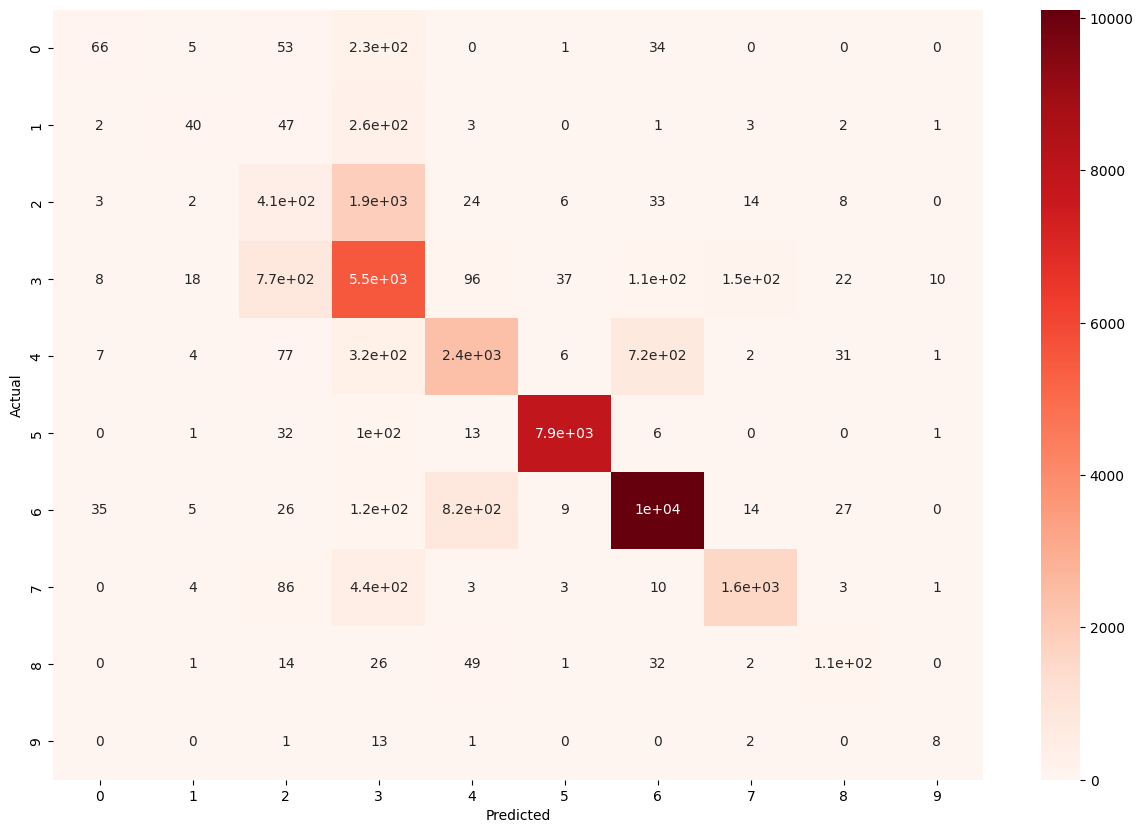


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.17      0.26       393
           1       0.50      0.11      0.18       360
           2       0.27      0.17      0.21      2370
           3       0.62      0.82      0.71      6772
           4       0.70      0.67      0.69      3570
           5       0.99      0.98      0.99      8079
           6       0.91      0.91      0.91     11169
           7       0.89      0.74      0.81      2098
           8       0.54      0.46      0.50       233
           9       0.36      0.32      0.34        25

    accuracy                           0.80     35069
   macro avg       0.63      0.54      0.56     35069
weighted avg       0.80      0.80      0.79     35069

Accuracy: 0.8031594855855599
Train operation time: =  15.760355949401855 seconds

Model: RandomForestClassifier
Confusion Matrix:
[[   54     3    42   248     2     0    44     0     0     0]
 [    2    38    41   26

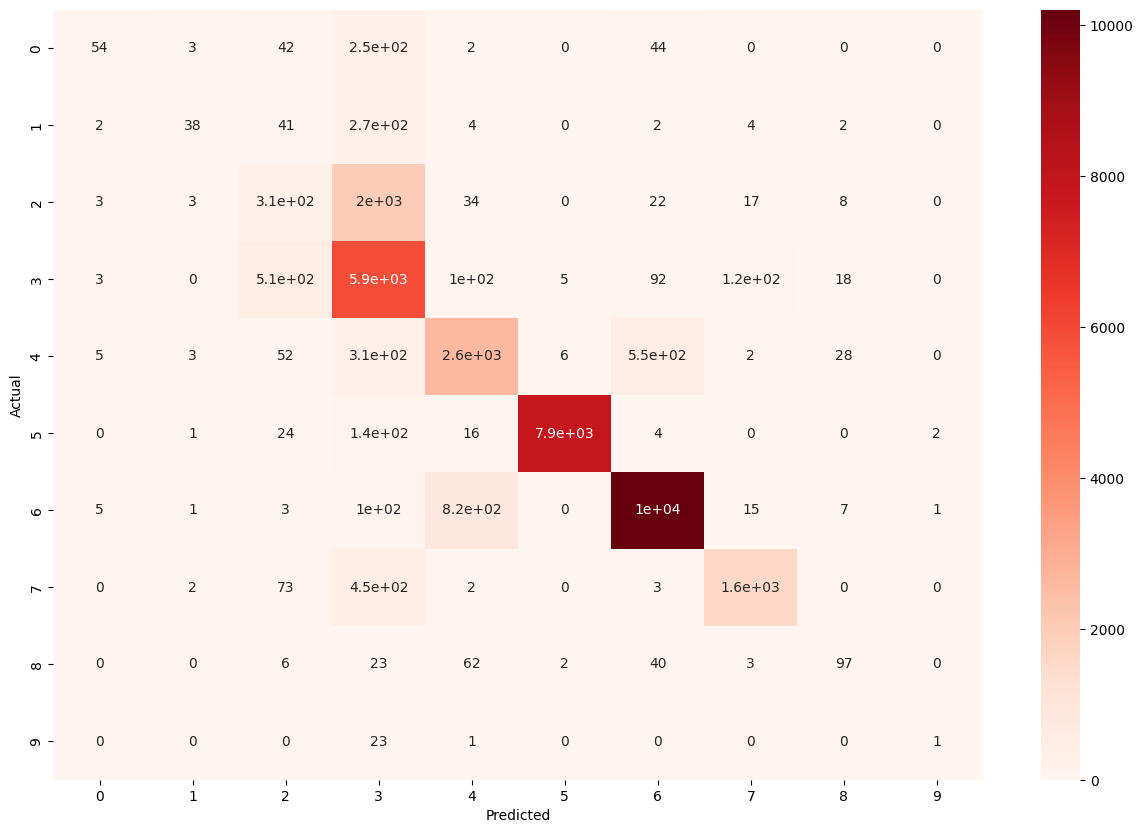


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.14      0.23       393
           1       0.75      0.11      0.18       360
           2       0.29      0.13      0.18      2370
           3       0.63      0.87      0.73      6772
           4       0.71      0.73      0.72      3570
           5       1.00      0.98      0.99      8079
           6       0.93      0.91      0.92     11169
           7       0.91      0.75      0.82      2098
           8       0.61      0.42      0.49       233
           9       0.25      0.04      0.07        25

    accuracy                           0.82     35069
   macro avg       0.68      0.51      0.53     35069
weighted avg       0.81      0.82      0.80     35069

Accuracy: 0.8185291853203684
Train operation time: =  498.07964181900024 seconds

Model: GradientBoostingClassifier
Confusion Matrix:
[[  48    0    2  309    0    0   34    0    0    0]
 [   0   30    0  314    7    

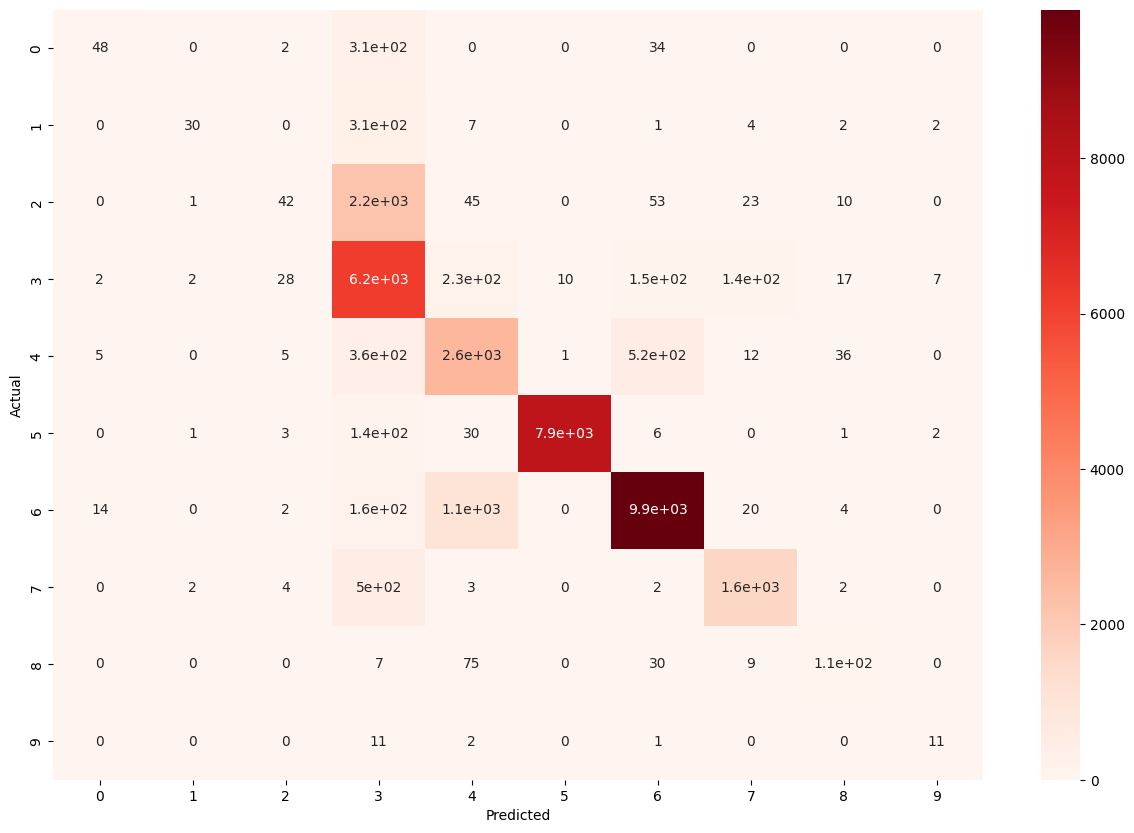


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.12      0.21       393
           1       0.83      0.08      0.15       360
           2       0.49      0.02      0.03      2370
           3       0.61      0.91      0.73      6772
           4       0.64      0.74      0.69      3570
           5       1.00      0.98      0.99      8079
           6       0.92      0.89      0.91     11169
           7       0.88      0.75      0.81      2098
           8       0.61      0.48      0.54       233
           9       0.50      0.44      0.47        25

    accuracy                           0.81     35069
   macro avg       0.72      0.54      0.55     35069
weighted avg       0.81      0.81      0.79     35069

Accuracy: 0.8112863212523882
Train operation time: =  0.3457968235015869 seconds

Model: KNeighborsClassifier
Confusion Matrix:
[[  27    2   98  221   20    0   22    3    0    0]
 [   3    2  119  210   14    0   11

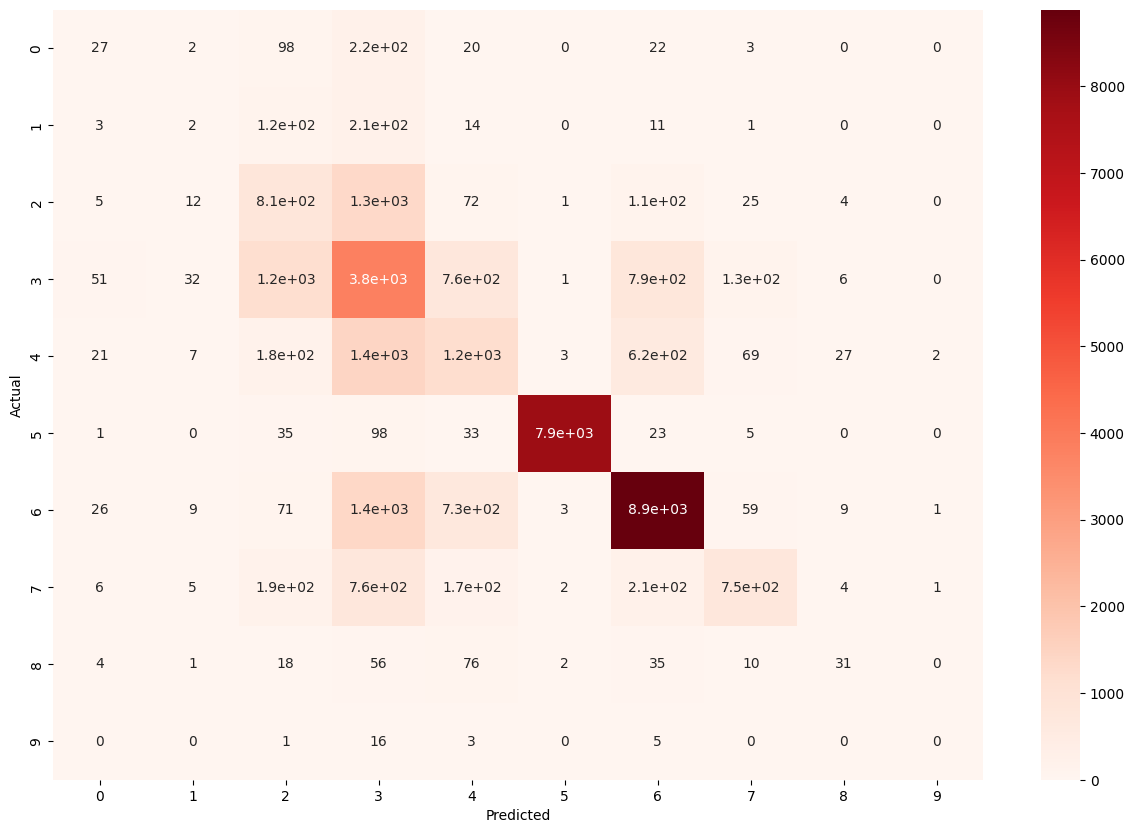


Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.07      0.10       393
           1       0.03      0.01      0.01       360
           2       0.30      0.34      0.32      2370
           3       0.41      0.57      0.48      6772
           4       0.39      0.34      0.36      3570
           5       1.00      0.98      0.99      8079
           6       0.83      0.80      0.81     11169
           7       0.71      0.36      0.48      2098
           8       0.38      0.13      0.20       233
           9       0.00      0.00      0.00        25

    accuracy                           0.67     35069
   macro avg       0.42      0.36      0.37     35069
weighted avg       0.68      0.67      0.67     35069

Accuracy: 0.6685391656448716
Train operation time: =  1574.1663551330566 seconds

Model: SVC
Confusion Matrix:
[[  26    0    0  336    1    0   30    0    0    0]
 [   0    0    0  316   28    0    5   11    0    0]


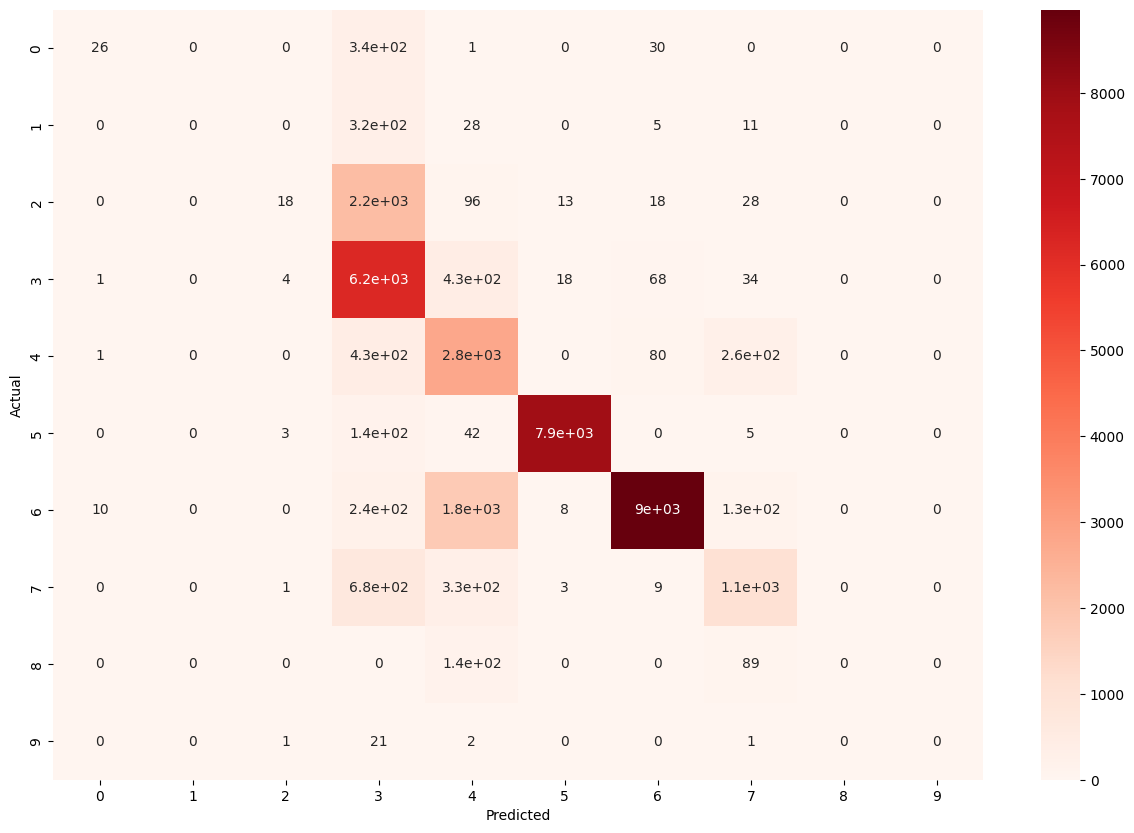


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.07      0.12       393
           1       0.00      0.00      0.00       360
           2       0.67      0.01      0.02      2370
           3       0.59      0.92      0.72      6772
           4       0.49      0.78      0.60      3570
           5       0.99      0.98      0.99      8079
           6       0.98      0.80      0.88     11169
           7       0.66      0.51      0.58      2098
           8       0.00      0.00      0.00       233
           9       0.00      0.00      0.00        25

    accuracy                           0.77     35069
   macro avg       0.51      0.41      0.39     35069
weighted avg       0.80      0.77      0.74     35069

Accuracy: 0.7695400496164704


/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [23]:
# Loop through models and evaluate each one
for model_name, model in models.items():
    # For SVM and Logistic Regression, use scaled data
    if model_name in ["Logistic Regression", "Support Vector Machine (SVM)"]:
        evaluate_model(model, X_train_scaled_df, y_train_df, X_test_scaled_df, y_test_df)
    else:
        evaluate_model(model, X_train_df, y_train_df, X_test_df, y_test_df)